In [1]:
from full_packages import *

# Spectral indices missions

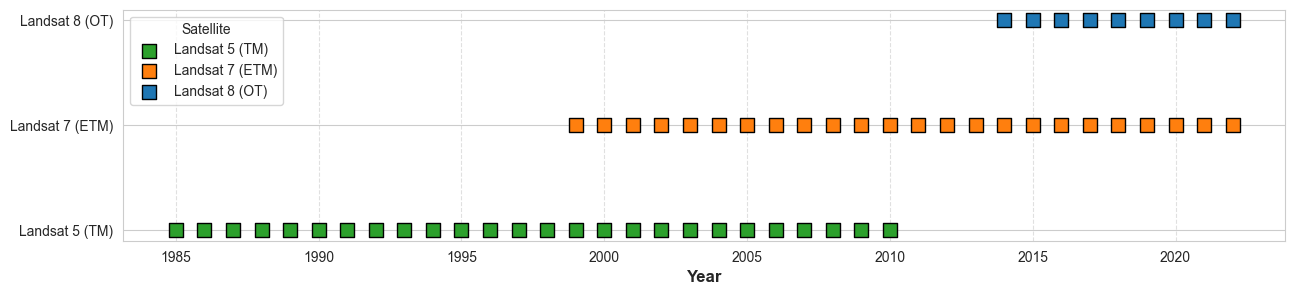

In [2]:
# Define Landsat coverage periods
landsat_data = [
    (np.arange(2014, 2023), 1, 'Landsat 8 (OT)', 's', "#1f77b4"),  # Blue Squares
    (np.arange(1999, 2003), 2, 'Landsat 7 (ETM)', 's', "#ff7f0e"),  # Orange Squares
    (np.arange(2003, 2023), 2, 'Landsat 7 (ETM)', '^', "#ff7f0e"),  # Orange Triangles
    (np.arange(1985, 2011), 3, 'Landsat 5 (TM)', 's', "#2ca02c")   # Green Squares
]

# Create DataFrame
dataframes = [
    pd.DataFrame({"year": years, "value": value, "label": label, "marker": marker, "color": color})
    for years, value, label, marker, color in landsat_data
]
df = pd.concat(dataframes)

# Create Figure
plt.figure(figsize=(15, 3))
sns.set_style("whitegrid")

# Plot each Landsat series with corresponding marker and color
for label, group in df.groupby("label"):
    plt.scatter(group["year"], group["value"], s=100, label=label, 
                marker=group["marker"].iloc[0], color=group["color"].iloc[0], edgecolors="black")

# Formatting
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("")
#plt.title("Landsat Satellite Coverage Over Time", fontsize=14, fontweight="bold")
plt.yticks([1, 2, 3], ["Landsat 8 (OT)", "Landsat 7 (ETM)", "Landsat 5 (TM)"])
plt.gca().invert_yaxis()  # Keep the latest Landsat at the top
plt.legend(title="Satellite", fontsize=10, frameon=True, loc="upper left")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Save the plot (optional)
plt.savefig("Figures/Landsat_Coverage.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


# Spectral indices data quality

In [3]:
def plot_median_quality_trends(all_data, noot_data, output_path="Figures", filename="Median_Quality_Per_Year.png"):
    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # Define color palette
    color_all = "#2C3E50"  # Deep Blue
    color_noot = "#E74C3C"  # Warm Red

    # Set Seaborn Style
    sns.set_style("whitegrid")

    # Create Figure
    plt.figure(figsize=(12, 6))

    # Plot All Dataset
    sns.lineplot(
        data=all_data, x='year', y='qual', 
        marker='o', linestyle="-", linewidth=2.5, markersize=7, 
        label="All Dataset", color=color_all, alpha=0.9
    )

    # Plot Noot Dataset
    sns.lineplot(
        data=noot_data, x='year', y='qual', 
        marker='s', linestyle="--", linewidth=2.5, markersize=7, 
        label="Noot Dataset", color=color_noot, alpha=0.9
    )

    # Labels and Title
    plt.xlabel('Year', fontsize=13, fontweight="bold", color="#34495E")
    plt.ylabel('Median Quality', fontsize=13, fontweight="bold", color="#34495E")

    # Improved Legend Positioning and Styling
    plt.legend(
        title="ST Index", fontsize=12, title_fontsize=12, 
        frameon=True, loc="upper right", edgecolor="#555555"
    )

    # Improve Grid Readability
    plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

    # Improve Axis Aesthetics
    plt.xticks(fontsize=11, color="#2C3E50")
    plt.yticks(fontsize=11, color="#2C3E50")

    # Save the figure in high resolution
    file_path = os.path.join(output_path, filename)
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    # Show the Plot
    plt.show()
    print(f"Plot saved successfully at: {file_path}")

## Grand Geneve study area

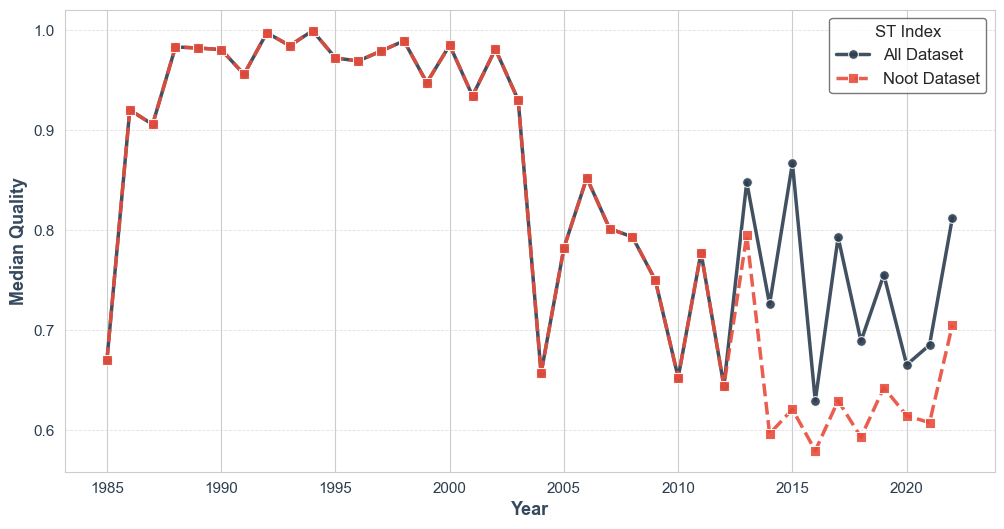

Plot saved successfully at: Figures/Median_Quality_Per_Year-GG.png


In [4]:
csv_path_noot = './Spectral_Indices_Dataset/GrandGeneve/LST/LST_daily_noot.csv'
dfnoot = pd.read_csv(csv_path_noot)
dfnoot = dfnoot[dfnoot['var'] == 'st']

dfnoot['date'] = pd.to_datetime(dfnoot['date'])
dfnoot['year'] = dfnoot['date'].dt.year
noot_median_qual_per_year = dfnoot.groupby('year')['qual'].median().reset_index()


csv_path_all = './Spectral_Indices_Dataset/GrandGeneve/LST/LST_daily_all.csv'


dfall = pd.read_csv(csv_path_all)
dfall = dfall[dfall['var'] == 'st']

dfall['date'] = pd.to_datetime(dfall['date'])
dfall['year'] = dfall['date'].dt.year
all_median_qual_per_year = dfall.groupby('year')['qual'].median().reset_index()
plot_median_quality_trends(all_median_qual_per_year, noot_median_qual_per_year,filename="Median_Quality_Per_Year-GG.png")